## Importing the large instance B1

In [2]:
import pandas as pd

data_b1 = pd.read_excel('Data\Instances\Large_Instances.xlsx', sheet_name='B1', index_col=0)
data_b1.head()

,X,Y,demand,lsp,designation
Number,,,,,
1,14.341022,10.221396,0,1.0,d
2,49.281272,40.161319,0,2.0,d
3,14.532059,18.241839,0,1.0,s
4,40.264580,30.524851,0,2.0,s
5,15.868504,37.159370,0,1.0,s


In [31]:
# all different points separated
satellites  = data_b1[data_b1['designation'] == 's'].copy()
customers   = data_b1[data_b1['designation'] == 'c'].copy()
depots       = data_b1[data_b1['designation'] == 'd'].copy()
collaboration_points = data_b1[data_b1['designation'] == 'z'].copy()

## Algorithm 1 
**Phase A** - An improved greedy algorithm for allocation and balancing

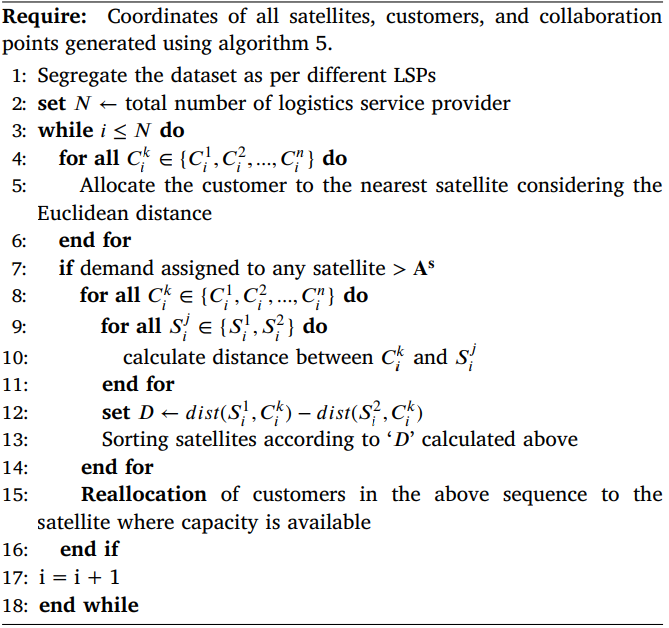

- **Arguments:** satellites, collaboration points, and customers
- **Return:** customer dataframe with origin satellite assigned

In [32]:
# Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [ ]:
def algorithm_1(satellites, customers, collaboration_points):
    sat = satellites.copy()
    cust = customers.copy()
    collab_pts = collaboration_points.copy()




    return cust

## Algorithm 2
**Phase B** - Assignment of a clustered satellite and a collaboration point to each customer

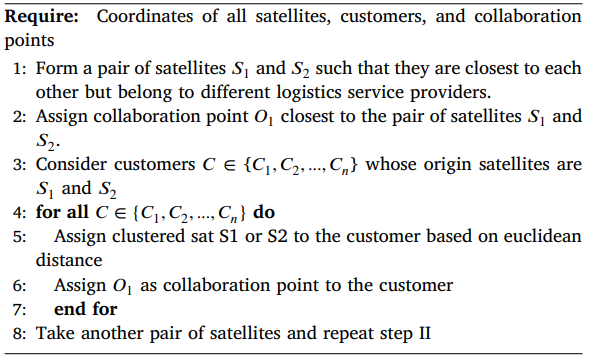

- **Arguments:** satellites, collaboration points, and customers
- **Return:** customer dataframe with clustered satellite and collaboration point assigned

In [ ]:
def algorithm_2(satellites, customers, collaboration_points):
    sat = satellites.copy()
    cust = customers.copy()
    collab_pts = collaboration_points.copy()

    # Form a pair of satellites 𝑆1 and 𝑆2 such that they are closest to each other but belong to different logistics service providers
    sat_pairs = []
    for sat1 in sat.index:
        for sat2 in sat.index:
            if sat.loc[sat1]['lsp'] != sat.loc[sat2]['lsp']:
                print('Satellite 1:', sat1, 'Satellite 2:', sat2)
                sat_pairs.append((sat1, sat2))

    # Assign collaboration point 𝑂1 closest to the pair of satellites 𝑆1 and 𝑆2
    collab_pt_o1 = {}
    for sat_pair in sat_pairs:
        sat1 = sat.loc[sat_pair[0]]
        sat2 = sat.loc[sat_pair[1]]
        collab_pts['dist_o1'] = collab_pts.apply(lambda x: euclidean_distance(x['X'], x['Y'], sat1['X'], sat1['Y']) + euclidean_distance(x['X'], x['Y'], sat2['X'], sat2['Y']), axis=1)
        collab_pt_o1[sat_pair] = collab_pts['dist_o1'].idxmin()

    # Consider customers 𝐶 ∈ {𝐶1, 𝐶2, ..., 𝐶𝑛} whose origin satellites are 𝑆1 and 𝑆2
    # For all customers- 
    # Assign clustered sat S1 or S2 to the customer based on euclidean distance
    # Assign 𝑂1 as collaboration point to the customer

    for sat_pair in sat_pairs:
        sat1 = sat.loc[sat_pair[0]]
        sat2 = sat.loc[sat_pair[1]]
        cust['dist_s1'] = cust.apply(lambda x: euclidean_distance(x['X'], x['Y'], sat1['X'], sat1['Y']), axis=1)
        cust['dist_s2'] = cust.apply(lambda x: euclidean_distance(x['X'], x['Y'], sat2['X'], sat2['Y']), axis=1)
        cust['clustered_sat'] = cust.apply(lambda x: sat_pair[0] if x['dist_s1'] < x['dist_s2'] else sat_pair[1], axis=1)
        cust['collab_pt'] = collab_pt_o1[sat_pair]

    return cust

## Algorithm 3
**Phase C** - Allocation of the customer to different vehicles and routing for each vehicle

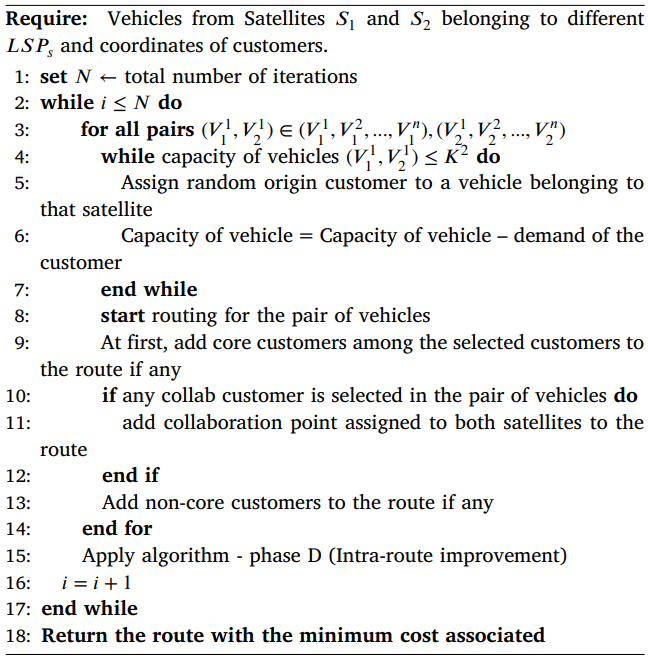